In [21]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

ModuleNotFoundError: No module named 'raw_input'

In [9]:
data = pd.read_csv("heart.csv")

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [101]:
'''target = str(input("What is the name of target variable, exactly as it appears in the header?\n"))

keep_list = []
x = ''

print("Enter columns you'd like to profile one at a time exactly as they appear in the header.\
When finished, type 'done'. If you'd like to profile all variables, enter 'all'.\n")

while x != "done":
    x = str(input("Enter column name, all, or done\n"))
    if x == 'all':
        keep_list = data.columns
        break
    else:
        keep_list += [x]
        
keep_list.remove('done')

if target not in keep_list:
    keep_list += target
    
data_mini = data[keep_list]'''

'target = str(input("What is the name of target variable, exactly as it appears in the header?\n"))\n\nkeep_list = []\nx = \'\'\n\nprint("Enter columns you\'d like to profile one at a time exactly as they appear in the header.When finished, type \'done\'. If you\'d like to profile all variables, enter \'all\'.\n")\n\nwhile x != "done":\n    x = str(input("Enter column name, all, or done\n"))\n    if x == \'all\':\n        keep_list = data.columns\n        break\n    else:\n        keep_list += [x]\n        \nkeep_list.remove(\'done\')\n\nif target not in keep_list:\n    keep_list += target\n    \ndata_mini = data[keep_list]'

#### Variable Explanations
age: age in years
sex: (1 = male; 0 = female)
cp: chest pain type
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: 1 or 0

In [80]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [82]:
data.groupby('target')['restecg'].mean()

target
0    0.449275
1    0.593939
Name: restecg, dtype: float64

In [83]:
data.groupby('target')['age'].mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

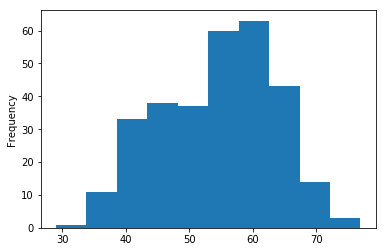

In [85]:
data['age'].plot(kind='hist')

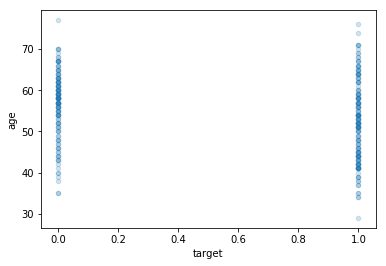

In [8]:
data.plot(kind='scatter', x='target', y='age', alpha=0.2)

LinAlgError: singular matrix

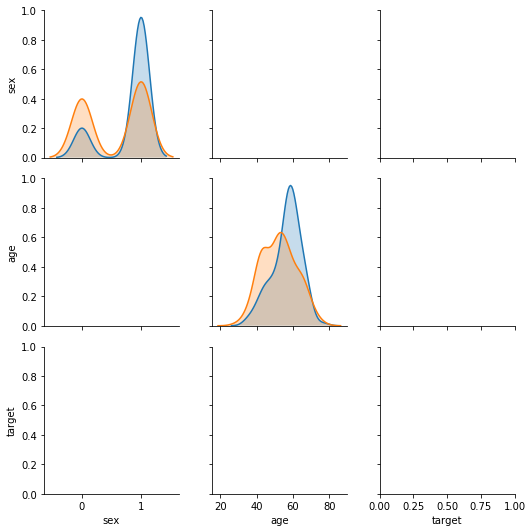

In [91]:
sb.pairplot(data[['sex','age','target']], hue='target')

In [92]:
raw_features = data.drop('target', axis='columns')
y = data[['target']].values

In [93]:
X = pd.get_dummies(raw_features)
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

In [95]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

In [97]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,32,12
Hit,5,42


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



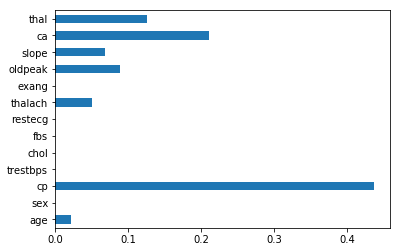

In [99]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh')

In [100]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
not_important = np.zeros((len(aa.ravel()), 4))
ab = np.c_[aa.ravel(), bb.ravel(), not_important]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 6 